In [1]:
# cpu 활용
# 드라이브 연동
# drive 폴더가 안보인다 > content 클릭
# 딥러닝 폴더까지 경로 이동 (상대경로 활용)
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning_AI2(2310)

/content/drive/MyDrive/Colab Notebooks/DeepLearning_AI2(2310)


### 목표
 - 폐암환자의 생존을 예측하는 분류모델을 만들어보자!
 - 다층퍼셉트론(신경망)을 이용하여 이진 분류 문제를 해결해보자!

In [2]:
# 환경세팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# tensorflow.keras > 뼈대구축
from tensorflow.keras import Sequential
# tensorflow.keras.layers > 층 내용 정의
from tensorflow.keras.layers import Dense
# sklearn.model_selection > 훈련 셋, 테스트셋 분리
from sklearn.model_selection import train_test_split

In [6]:
# 데이터 불러오기
# header = None: 데이터를 불러오면서 컬럼에 대한 설정을 인덱스 번호로 출력
data = pd.read_csv('./data/ThoraricSurgery.csv', header = None)
data

# 컬럼명 정보 생략함 , 설명변수, 독립변수)
# 0~16번까지 컬럼(17개): 문제 데이터(특성데이터)
# 종양 유형, 폐활량, 고통정도, 기침 등 환자 상태 정보
# 마지막 17번째 컬럼: 답 데이터(0: 사망, 1 : 생존)
# 전처리 x
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       470 non-null    int64  
 1   1       470 non-null    int64  
 2   2       470 non-null    float64
 3   3       470 non-null    float64
 4   4       470 non-null    int64  
 5   5       470 non-null    int64  
 6   6       470 non-null    int64  
 7   7       470 non-null    int64  
 8   8       470 non-null    int64  
 9   9       470 non-null    int64  
 10  10      470 non-null    int64  
 11  11      470 non-null    int64  
 12  12      470 non-null    int64  
 13  13      470 non-null    int64  
 14  14      470 non-null    int64  
 15  15      470 non-null    int64  
 16  16      470 non-null    int64  
 17  17      470 non-null    int64  
dtypes: float64(2), int64(16)
memory usage: 66.2 KB


### 데이터 분리
 - 문제와 답 분리
 - 훈련 셋과 테스트 셋 분리
  - 7:3, 랜덤 고정 5

In [12]:
X = data.iloc[:, :17]
y = data.iloc[:, 17]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state= 5)

# 크기 확인 캡쳐까지
print('훈렷셋', X_train.shape, y_train.shape)
print('테스트셋', X_test.shape, y_test.shape)

훈렷셋 (329, 17) (329,)
테스트셋 (141, 17) (141,)


In [13]:
# y_train 데이터의 균형을 확인해보기
# 0 -> ?, 1 -> ?
np.unique(y_train, return_counts = True) # 별로 좋은 데이터가 아님

(array([0, 1]), array([281,  48]))

#### keras 활용하여 딥러닝 신경망 구축!
 - 1. 뼈대 + 층 내용 정의: 구조 설계
 - 2. 학습 + 평가 방법 설정: 컴파일(번역)
 - 3. 학습 + 현황 시각화(선그래프 추이 확인)
 - 4. 예측 + 평가

In [19]:
# 딥러닝 구현 도구 불러오기
# tensorflow > keras
# 뼈대 구축 > 층 내용 정의(뉴런 개수 등..)
from tensorflow.keras import Sequential
# Sequential : 뼈대를 구축하기 위한 신경망 관련 함수
from tensorflow.keras.layers import Dense, Activation
# Dense: 신경망 층(뉴런의 묶음)을 구성하는 함수
# Activation : 활성화 함수

In [23]:
# 뼈대 구축
binary_model = Sequential()

# 입력층 + 중간층 1
# 유닛갯수: 사실상 정답 10개 맞추고 가자
# activation : 시그모이드
# 입력 데이터 크기 : 특성의 개수 만큼
binary_model.add(Dense(10, input_dim = 17, activation = 'sigmoid'))

# 중간층 2개
# 5, sigmoid
# 3, sigmoid
binary_model.add(Dense(5, activation = 'sigmoid'))
binary_model.add(Dense(3, activation = 'sigmoid'))


# 출력층
# 이진 분류
# 유닛 개수 = 1, activation = 'sigmoid'
binary_model.add(Dense(1, activation = 'sigmoid'))

# 모델 정보 요약
binary_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                180       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dense_6 (Dense)             (None, 3)                 18        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# 2. 학습/평가 방법(compile)
# 분류(이진) -> loss : 'binary_crossentropy'
#               optimizer : 'sgd' # 기본적인 확률적 경사하강법, w,b를 최적화하는 도구
binary_model.compile(loss = 'binary_crossentropy',
                     optimizer = 'sgd',
                     metrics = ['accuracy']) # 분류 평가지표

In [26]:
# 3. 학습
# 학습 현장 저장 h
# fit(문제, 답, 반복횟수 = 100)

h = binary_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5228
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.8541
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.8541
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.8541
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.8541
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.8541
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.8541
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.8541
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.8541
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5234 - accuracy: 0.8541
Epoch 11/

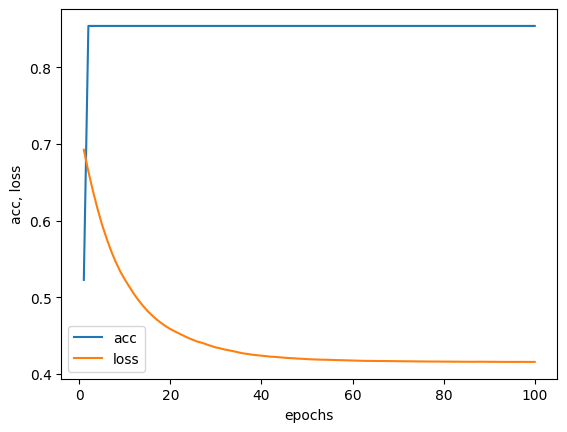

In [32]:
# accuracy 선그래프 시각화
plt.plot(range(1,101), h.history['accuracy'], label = 'acc')
plt.plot(range(1,101), h.history['loss'], label = 'loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc, loss')
plt.show()

In [33]:
# 모델 평가
# test 성능 어느정도?
# 평가하다
# 머신러닝모델.score(X_test, y_test)
binary_model.evaluate(X_test,y_test)[1]

5/5 [==============================] - 0s 5ms/step - loss: 0.4331 - accuracy: 0.8440


0.8439716100692749

In [36]:
# X_test 예측해보기
# predict(문제) -> 예측값?
pred = binary_model.predict(X_test)
pred

# 0.5 보다 낮은 결과들 > 모두 사망함

5/5 [==============================] - 0s 5ms/step


array([[0.15312526],
       [0.15637848],
       [0.15312476],
       [0.15312469],
       [0.15312469],
       [0.15312469],
       [0.15312472],
       [0.15663077],
       [0.15312476],
       [0.15193982],
       [0.15183656],
       [0.1531259 ],
       [0.15312469],
       [0.1531358 ],
       [0.15117459],
       [0.15312482],
       [0.153127  ],
       [0.15100674],
       [0.15315065],
       [0.15278363],
       [0.15312497],
       [0.15312478],
       [0.15313283],
       [0.15312469],
       [0.15312469],
       [0.1531262 ],
       [0.15313229],
       [0.15313053],
       [0.15312485],
       [0.15312918],
       [0.15312472],
       [0.15321796],
       [0.15162668],
       [0.15196347],
       [0.15317172],
       [0.15313795],
       [0.1531251 ],
       [0.15310541],
       [0.1531251 ],
       [0.15312482],
       [0.15312482],
       [0.15239228],
       [0.1531251 ],
       [0.15317965],
       [0.15312867],
       [0.1531347 ],
       [0.15312478],
       [0.153

In [40]:
# 혼동행렬표
# confusion_matrix
# 0, 1 실제와 예측값 비교하는 표
pred2 = pred > 0.5
pred2

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred2)
cm
# 인덱스 실제 내용 > 실제0, 실제1
# 컬럼 예측 내용 > 예측0, 예측1
cm_df = pd.DataFrame(cm, index = ['실제0', '실제1'],
                     columns =['예측0', '예측1'])
cm_df
# pred의 예측 결과 전체 0
# 실제로 사망결과를 예측 사망이라고 판단한 것 119 (잘 맞춘 것)
# 실제로 생존결과를 예측 사망이라고 잘못 판단한 것 22개 (잘 못 맞춘 것)
# 1에 대한 데이터를 더 연결해줘야할 필요가 있을 것 같고
# 분류 평가지표 중에서 rcc_auc 곡선 그래프를 그려 확인함. 다른 평가 f1_score 사용해보면 좋겠음


,예측0,예측1
실제0,119,0
실제1,22,0


/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
cm_df['예측0'].plot(kind='hist', bins=20, title='예측0')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['예측1']
  ys = series['예측0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cm_df.sort_values('예측1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('예측1')
_ = plt.ylabel('예측0')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['예측1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '예측1'}, axis=1)
              .sort_values('예측1', ascending=True))
  xs = counted['예측1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cm_df.sort_values('예측1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('예측1')
_ = plt.ylabel('count()')

/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
cm_df['예측0'].plot(kind='line', figsize=(8, 4), title='예측0')
plt.gca().spines[['top', 'right']].set_visible(False)